In [96]:
import rosbag
from geometry_msgs.msg import Vector3
import rospy

bag = rosbag.Bag('/home/miguel/catkin_ws/src/crazyflie/crazyflie_controller/src/data/data_record.bag')

import matplotlib.pyplot as plt

position_optitrack = []
position_state_estimate = []
vel_optitrack = []
vel_state_estimate = []
position_gaussian_error = []

for topic, msg, t in bag.read_messages(topics=['position_Optitrack', 'position_estimate_topic', 'vel_Optitrack', 'vel_estimate_topic', 'position_gaussian_error']):
    
    if topic == 'position_Optitrack':
        position_optitrack.append((msg.x, msg.y, msg.z))

    if topic == 'position_estimate_topic':
        position_state_estimate.append((msg.x, msg.y, msg.z))

    if topic == 'vel_Optitrack':
        vel_optitrack.append((msg.x, msg.y, msg.z))

    if topic == 'vel_estimate_topic':
        vel_state_estimate.append((msg.x, msg.y, msg.z))

    if topic == 'position_gaussian_error':
        position_gaussian_error.append((msg.x, msg.y, msg.z))

# After processing, close the bag
bag.close()


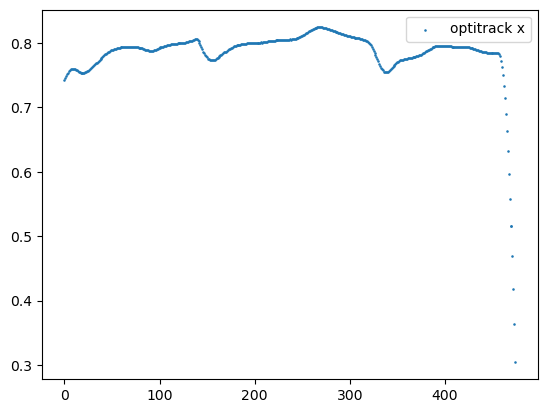

In [97]:
# Plotting example
plt.scatter(range(len(position_optitrack)), [x[2] for x in position_optitrack], label='optitrack x', s=0.7)
# plt.scatter(range(len(position_state_estimate)), [x[2] for x in position_state_estimate], label='kalman x', s=0.7)
# Add more plots as needed
plt.legend()
plt.show()

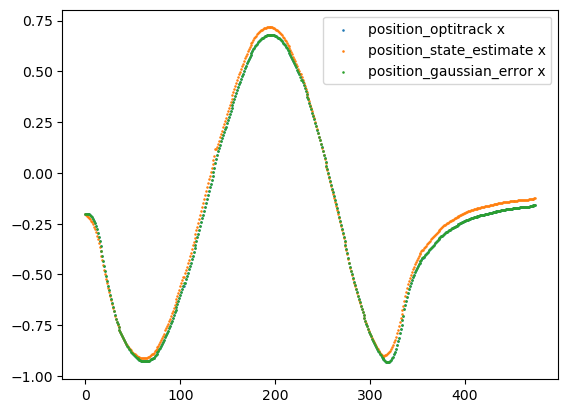

In [98]:
# Plotting example
plt.scatter(range(len(position_optitrack)), [x[0] for x in position_optitrack], label='position_optitrack x', s=0.7)
plt.scatter(range(len(position_state_estimate)), [x[0] for x in position_state_estimate], label='position_state_estimate x', s=0.7)
plt.scatter(range(len(position_gaussian_error)), [x[0] for x in position_gaussian_error], label='position_gaussian_error x', s=0.7)
#plt.ylim(0.8, 0.95)
# Add more plots as needed
plt.legend()
plt.show()

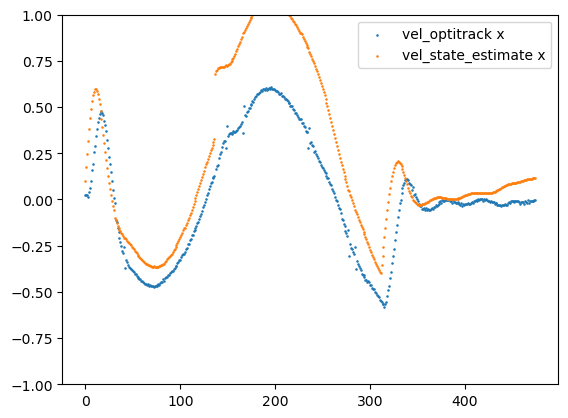

In [99]:
# Plotting example
# r_xyz = 0.1
plt.scatter(range(len(vel_optitrack)), [x[1] for x in vel_optitrack], label='vel_optitrack x', s=0.7)
plt.scatter(range(len(vel_state_estimate)), [x[1] for x in vel_state_estimate], label='vel_state_estimate x', s=0.7)
plt.ylim(-1, 1)
# Add more plots as needed
plt.legend()
plt.show()


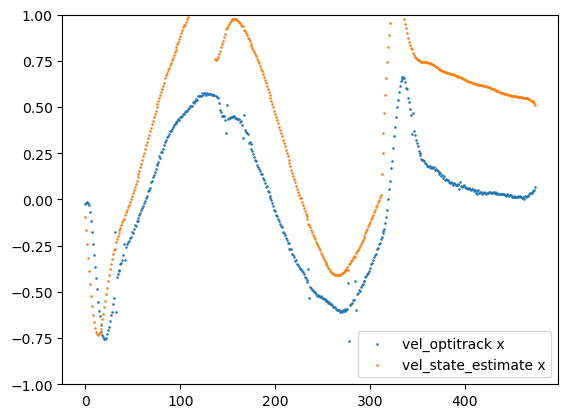

In [100]:
# Plotting example
plt.scatter(range(len(vel_optitrack)), [x[0] for x in vel_optitrack], label='vel_optitrack x', s=0.7)
plt.scatter(range(len(vel_state_estimate)), [(x[0]) for x in vel_state_estimate], label='vel_state_estimate x', s=0.7)
plt.ylim(-1, 1)
# Add more plots as needed
plt.legend()
plt.show()

In [101]:
import numpy as np
print(np.array(vel_state_estimate)[100:110, 2])
print(np.array(vel_optitrack)[100:110, 2])
np.array(0.01**2 * np.eye(3))


[0.64107791 0.63914443 0.63707509 0.6355776  0.63431184 0.63431184
 0.63261445 0.63138191 0.62994018 0.62899299]
[0.01492395 0.01992471 0.02112009 0.0160059  0.0160059  0.01370123
 0.01733423 0.01317049 0.01485621 0.01037521]


array([[0.0001, 0.    , 0.    ],
       [0.    , 0.0001, 0.    ],
       [0.    , 0.    , 0.0001]])